# Link Prediction 
In this workshop we will implement PageRank, Weighted PageRank and Hits

In [1]:
import numpy as np

## Part 1: 
The algorithm below aims to calculate the convergence score of the PageRank algorithm
the input of the algorithm is the adjacency matrix of a given graph

### Exercise:
Calculate PageRank scores for the following graph: 
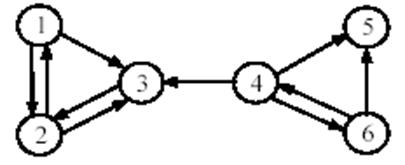

In [2]:

def calculate_PageRank(outlinks):
    """
    A function that returns PageRank scores for different nodes

    Parameters:
-----------
    outlinks: (nxn) a matrix containing outlinks "outlinks" for each node 

    Returns:
    --------
    page_ranks: list, containing the pageRanks for each node 
"""

    # "damping factor"
    d = 0.85
    
    # the size of the matrix 
    size = outlinks.shape[0]
    
    # a list to store pagerank scores 
    page_ranks = [1 for i in range(size)]
    
    #  calculate outdegree for each node
    out_degrees = []
    for i in range(size):
        sums = 0
        for j in range(size):
            sums += outlinks[i][j]
        out_degrees.append(sums)

    print(out_degrees)
    
    print(' initial PageRank:')
    print(page_ranks)
    
    for _ in range(100):
        for j in range(size):
            temp = 0
            for i in range(size):
                if outlinks[i][j] == 1:
                    temp += page_ranks[i] / out_degrees[i]
            temp *= d
            temp += (1-d)
            page_ranks[j] = round(temp, 4)

    return page_ranks

#outlinks = [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
#outlinks = np.reshape(outlinks, (5, 5))
outlinks = [0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0]
outlinks = np.reshape(outlinks, (6,6))
print('La matrice d adjacence : ')
print(outlinks)
print('-------------------------------------------')
page_ranks = calculate_PageRank(outlinks)
print()
print('The pageranks converge towards :')
print(page_ranks)
print()
sums = 0
for i in page_ranks:
    sums += i
print('the sum of the PageRanks: ', round(sums, 4))

La matrice d adjacence : 
[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]]
-------------------------------------------
[2, 2, 1, 3, 0, 2]
 initial PageRank:
[1, 1, 1, 1, 1, 1]

The pageranks converge towards :
[0.7835, 1.4905, 1.1853, 0.243, 0.3118, 0.2188]

the sum of the PageRanks:  4.2329


## part 2:
the algorithm at the bottom is an implementation of the Weighted PageRank algorithm.

The corresponding scientific article is as follows: 

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.92.6452&rep=rep1&type=pdf

On Page 4 you will find an example calculation. 

### Exercise

You are required to complete the algorithm code by replacing "None" with the corresponding code. 

In [3]:

def calculate_PageRank(outlinks):

    """
    A function that returns PageRank scores for different nodes 
    
    Parameters:
    -----------
    outlinks: (nxn) a matrix containing outlinks "outlinks" for each node 
    
    Returns:
    --------
    page_ranks: list, containing the weighted pageRanks for each node 
    """
    # "damping factor"
    d = 0.85
    
    # the matrix size 
    size = outlinks.shape[0]
    
    # a list to store pagerank score
    page_ranks = [1 for i in range(size)]
    
    # calculate the Out degrees for each node
    out_degrees = []
    for i in range(size):
        sums = 0
        for j in range(size):
            sums += outlinks[i][j]
        out_degrees.append(sums)
    # calculate the in degree for each node
    in_degrees = []
    for j in range(5):
        sums = 0
        for i in range(5):
            sums += outlinks[i][j]
        in_degrees.append(sums)

    print(in_degrees)
    print(out_degrees)
    
    print('Initial page ranks:')
    print(page_ranks)

    # Store destination nodes for each node
    nodes = {}
    for i in range(5):
        temp = []
        for j in range(5):
            if outlinks[i][j] == 1:
                temp.append(j)
        nodes[i] = temp

    print(nodes)

    for _ in range(100):
        for j in range(size):
            temp = 0
            for i in range(size):
                out_degree = 0
                in_degree = 0
                if outlinks[i][j] == 1:
                    for l in nodes[i]:
                        out_degree += out_degrees[l]
                        in_degree += in_degrees[l]
                    temp += page_ranks[i] * (out_degrees[j]/out_degree) * (in_degrees[j]/in_degree) 
            temp *= d
            temp += (1 - d)
            page_ranks[j] = round(temp, 4)

    return page_ranks

outlinks = [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
outlinks = np.reshape(outlinks, (5, 5))
#outlinks = [0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0]
#outlinks = np.reshape(outlinks, (6,6))
page_ranks = calculate_PageRank(outlinks)
print()
print('the weighted pagerank converge towards:')
print(page_ranks)
sums = 0
for i in page_ranks:
    sums += i
print('\n the sum of the weighted PageRank is: ', round(sums, 4))

[1, 2, 4, 4, 1]
[3, 3, 1, 2, 3]
Initial page ranks:
[1, 1, 1, 1, 1]
{0: [1, 2, 3], 1: [0, 2, 3], 2: [3], 3: [2, 4], 4: [1, 2, 3]}

the weighted pagerank converge towards:
[0.1585, 0.1809, 0.2553, 0.431, 0.205]

 the sum of the weighted PageRank is:  1.2307


desired output:

the weighted pageranks converge towards:

[0.1585, 0.1809, 0.2553, 0.431, 0.205]

the sum of weighted PageRank is: 1.2307

## Part 3: 
An implementation of Hits' algorithm

Calculate the scores for the graph given above 

In [8]:


# Hits algo 
def authority_hub_score(outlinks):
    """
    this function calculates Authorities and Hubs for each node
    
    Parameters:
    ------------
    outlinks: (n, n) adjacency matrix 
    
    Returns:
    ---------
    hub_score: nd-array, contains hub scores 
    
    authority score: nd-array, contains authorities for each node 
    """
    
    # matrix size  
    size = outlinks.shape[0]
    
    # list initialization  
    hub_scores = [1.0 for i in range(size)]
    authority_scores = [1.0 for i in range(size)]
    
    #  initials hubs 
    print(hub_scores)
    
    for _ in range(100):
        # Calculates authority for each node 
        for j in range(size):
            temp_auth = 0.0
            for i in range(size):
                if outlinks[i][j] == 1:
                    temp_auth += hub_scores[i]
            authority_scores[j] = temp_auth

        # Authority score normalization 
        auth_sum = sum(authority_scores)
        # print(auth_sum)
        for i in range(len(authority_scores)):
            authority_scores[i] /= auth_sum

        # Calculate the hubs  score 
        for i in range(size):
            temp_hub = 0.0
            for j in range(size):
                if outlinks[i][j] == 1:
                    temp_hub += authority_scores[j]
            hub_scores[i] = temp_hub

        # Normalisation of hubs score 
        hub_sum = sum(hub_scores)
        # print(hub_sum)
        for i in range(len(hub_scores)):
            hub_scores[i] /= hub_sum

    return authority_scores, hub_scores

In [15]:
'''
n = int(input('enter the size of the matrix :\t'))
for i in range(n*n):
    temp = int(input('enter the elements :\t'))
    outlinks.append(temp)
'''
n = 6
outlinks = [0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0]
outlinks = np.reshape(outlinks, (n, n))
print('The adjacency matrix of the graph above : ')
print(outlinks)
print()
authority_scores, hub_scores = authority_hub_score(outlinks)
print("the authority scores :")
for i in (authority_scores):
    print(round(i, 4))
print("the hubs scores :")
for i in (hub_scores):
    print(round(i, 4))

The adjacency matrix of the graph above : 
[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
the authority scores :
0.0958
0.1316
0.3523
0.0572
0.2101
0.153
the hubs scores :
0.2365
0.219
0.0643
0.3496
0.0
0.1306
